In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../dataFiles/houseprices.csv")
print(data)


   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900


In [4]:
# Extract the features and target variable
X = data[['size', 'bedroom']].values
y = data['price'].values

# Feature scaling
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) 
X = (X - X_mean) / X_std

print(X)

[[ 0.          0.        ]
 [-0.88604177  0.        ]
 [ 0.52037374  0.        ]
 [-1.20951734 -1.58113883]
 [ 1.57518537  1.58113883]]


In [5]:
# Initialize parameters
w = np.zeros(X.shape[1])  # Weights
b = 0  # Bias
learning_rate = 0.01
num_epochs = 1000

In [6]:
# Define the RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_history = []  # Initialize RMSE history

for epoch in range(num_epochs):
    # Calculate and store RMSE
    predictions = X.dot(w) + b
    rmse_value = rmse(y, predictions)
    rmse_history.append(rmse_value)

    # Calculate gradients
    error = predictions - y
    grad_w = (-2 / len(X)) * np.dot(X.T, error)
    grad_b = (-2 / len(X)) * np.sum(error)

    # Update parameters
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

print(rmse_value)

1.0302689180694464e+21


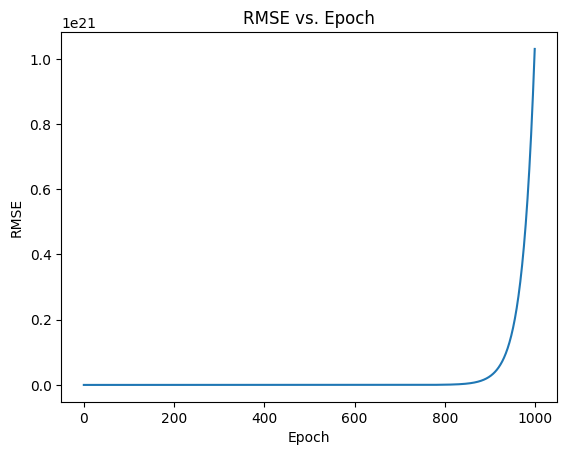

In [7]:
# Plot the RMSE history
plt.plot(range(num_epochs), rmse_history)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epoch')                                 
plt.show()